<a href="https://colab.research.google.com/github/supritat/Northstar-2.0/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


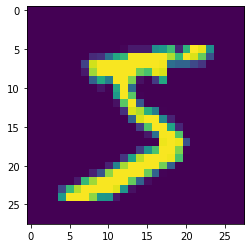

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 9))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  


In [52]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 18, 18, 512)       1180160   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 9, 9, 512)         0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 9, 9, 10)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.1526 - acc: 0.9533
Epoch 2/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.0604 - acc: 0.9817
Epoch 3/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.0478 - acc: 0.9851
Epoch 4/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0389 - acc: 0.9879
Epoch 5/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.0309 - acc: 0.9902
Epoch 6/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0268 - acc: 0.9913
Epoch 7/10
14368/60000 [======>.......................] - ETA: 18s - loss: 0.0196 - acc: 0.9932

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score)

[0.051000620294090825, 0.9891]


In [0]:
y_pred = model.predict(X_test)

In [28]:
print(y_pred[:9])
print(y_test[:9])

[[3.3942618e-18 3.0795847e-21 6.6118220e-14 9.7231260e-12 3.7872403e-24
  2.4692919e-21 4.5521519e-34 1.0000000e+00 1.4179500e-16 8.5524591e-12]
 [2.0175305e-14 3.5042496e-12 1.0000000e+00 2.8331840e-22 5.6395295e-16
  1.0530678e-31 6.3001882e-16 3.8409918e-21 1.1910214e-17 5.3666385e-24]
 [1.3960732e-16 1.0000000e+00 2.8070688e-11 3.9949086e-16 6.4813793e-10
  1.6352467e-13 9.6466871e-12 6.5507826e-09 3.4814523e-12 5.6751627e-15]
 [1.0000000e+00 1.6888208e-19 4.1678157e-13 1.4947043e-14 6.9673701e-16
  9.3787079e-14 4.2723043e-09 9.1101014e-17 8.4135086e-12 2.2926452e-11]
 [2.0364619e-19 1.3662930e-19 1.2161023e-17 1.7384338e-18 1.0000000e+00
  4.3566218e-26 3.9442116e-16 5.8487367e-19 4.1244414e-16 8.8849150e-11]
 [4.0356310e-18 9.9999976e-01 2.4357655e-10 8.2671051e-17 8.8016740e-11
  2.9636231e-18 1.3492514e-13 2.5406737e-07 1.9482212e-13 2.4864324e-14]
 [1.3394106e-28 9.8896333e-18 5.6975526e-21 3.5368850e-19 1.0000000e+00
  1.0073836e-19 1.1929152e-21 2.5375838e-17 2.1467196e-11 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = "sequential_3"):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored